In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd 'drive/My Drive/COVID Project'

/content/drive/My Drive/COVID Project


In [ ]:
!pip install torchxrayvision

     |████████████████████████████████| 29.0 MB 13 kB/s 
     |████████████████████████████████| 2.0 MB 39.3 MB/s 


In [ ]:
# !git clone https://github.com/mlmed/covid-severity.git

Cloning into 'covid-severity'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 61 (delta 19), reused 41 (delta 8), pack-reused 0
Unpacking objects: 100% (61/61), done.


In [ ]:
# !git clone https://github.com/ieee8023/covid-chestxray-dataset.git

Cloning into 'covid-chestxray-dataset'...
remote: Enumerating objects: 3641, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 3641 (delta 4), reused 6 (delta 2), pack-reused 3629
Receiving objects: 100% (3641/3641), 632.97 MiB | 19.40 MiB/s, done.
Resolving deltas: 100% (1446/1446), done.
Checking out files: 100% (1174/1174), done.


In [ ]:
ls

 catboost_info/             covid_data2.gsheet     covid-severity/
 covid-chestxray-dataset/   covid_data.csv         heatmap.jpg
'covid_data (1).gsheet'     covid_data.gsheet      ROC.png
 covid_data2.csv           'COVID Project.ipynb'


In [ ]:
import os
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('covid-chestxray-dataset/metadata.csv')
# labels_data.set_index('File name', inplace=True)
data

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,479,0.0,F,40.0,Pneumonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AP,X-ray,NaN,United Kingdom,images,072ecaf8c60a81980abb57150a8016_jumbo-9.jpeg,NaN,https://radiopaedia.org/cases/multifocal-round...,CC BY-NC-SA,Asthmatic. Shortness of breath and wheeze. Rou...,"Case courtesy of Dr Ian Bickle, Radiopaedia.or...",NaN
946,479,70.0,F,40.0,Pneumonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AP,X-ray,NaN,United Kingdom,images,ff33c406392b968d483174c97eb857_jumbo-9.jpeg,NaN,https://radiopaedia.org/cases/multifocal-round...,CC BY-NC-SA,Asthmatic. Shortness of breath and wheeze. The...,"Case courtesy of Dr Ian Bickle, Radiopaedia.or...",NaN
947,480,NaN,M,26.0,Pneumonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,NaN,NaN,images,000001-266.jpg,NaN,https://www.eurorad.org/case/947,CC BY-NC-SA 4.0,fire-eater accidentally ingested a paraffin mi...,NaN,NaN
948,481,NaN,M,50.0,Pneumonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AP,X-ray,NaN,NaN,images,000001-272.jpg,NaN,https://www.eurorad.org/case/934,CC BY-NC-SA 4.0,"The patient, a heavy smoker, was referred to t...",NaN,NaN


In [ ]:
covid_data = data.loc[data['finding'] == 'Pneumonia/Viral/COVID-19']
covid_data = covid_data[covid_data['survival'].notna()]
covid_data = covid_data[['patientid','sex','age','finding','intubated','intubation_present','went_icu','in_icu','folder','filename','survival','clinical_notes','other_notes']]
covid_data

,patientid,sex,age,finding,intubated,intubation_present,went_icu,in_icu,folder,filename,survival,clinical_notes,other_notes
0,2,M,65.0,Pneumonia/Viral/COVID-19,N,N,N,N,images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,Y,"On January 22, 2020, a 65-year-old man with a ...",NaN
1,2,M,65.0,Pneumonia/Viral/COVID-19,N,N,N,N,images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,Y,"On January 22, 2020, a 65-year-old man with a ...",NaN
2,2,M,65.0,Pneumonia/Viral/COVID-19,N,N,N,N,images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,Y,"On January 22, 2020, a 65-year-old man with a ...",NaN
3,2,M,65.0,Pneumonia/Viral/COVID-19,N,N,N,N,images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,Y,"On January 22, 2020, a 65-year-old man with a ...",NaN
20,11,M,56.0,Pneumonia/Viral/COVID-19,NaN,NaN,NaN,NaN,images,1-s2.0-S0140673620303706-fx1_lrg.jpg,Y,A 56-year-old man presented to our Emergency D...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,427a,M,77.0,Pneumonia/Viral/COVID-19,Y,NaN,Y,NaN,images,aqaa062i0002-a.png,N,"Case 1. Diffuse, dense bilateral airspace cons...",This article is published and distributed unde...
825,427b,M,42.0,Pneumonia/Viral/COVID-19,Y,Y,Y,NaN,images,aqaa062i0002-b.png,N,Case 2. Diffuse airspace opacities in both lun...,This article is published and distributed unde...
934,472,M,47.0,Pneumonia/Viral/COVID-19,N,N,N,N,images,16892_2_1.png,Y,A previously healthy 47-year-old male presente...,NaN
939,476,M,25.0,Pneumonia/Viral/COVID-19,NaN,NaN,NaN,NaN,images,16865_1_1.jpg,Y,A 25 year-old male resident presented with a 7...,NaN


In [ ]:
covid_data.isnull().sum(axis = 0)

patientid               0
sex                    19
age                    51
finding                 0
intubated             108
intubation_present    102
went_icu               73
in_icu                 88
folder                  0
filename                0
survival                0
clinical_notes         45
other_notes           151
dtype: int64

In [ ]:
covid_data.to_csv('covid_data.csv')

In [ ]:
covid_data2 = data.loc[data['finding'] == 'Pneumonia/Viral/COVID-19']
covid_data2 = covid_data2[covid_data2['survival'].notna()]
covid_data2 = covid_data2[['patientid','sex','age','finding','folder','filename','survival']]
covid_data2 = covid_data2.dropna()
covid_data2

,patientid,sex,age,finding,folder,filename,survival
0,2,M,65.0,Pneumonia/Viral/COVID-19,images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,Y
1,2,M,65.0,Pneumonia/Viral/COVID-19,images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,Y
2,2,M,65.0,Pneumonia/Viral/COVID-19,images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,Y
3,2,M,65.0,Pneumonia/Viral/COVID-19,images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,Y
20,11,M,56.0,Pneumonia/Viral/COVID-19,images,1-s2.0-S0140673620303706-fx1_lrg.jpg,Y
...,...,...,...,...,...,...,...
824,427a,M,77.0,Pneumonia/Viral/COVID-19,images,aqaa062i0002-a.png,N
825,427b,M,42.0,Pneumonia/Viral/COVID-19,images,aqaa062i0002-b.png,N
934,472,M,47.0,Pneumonia/Viral/COVID-19,images,16892_2_1.png,Y
939,476,M,25.0,Pneumonia/Viral/COVID-19,images,16865_1_1.jpg,Y


In [ ]:
covid_data2['survival'].value_counts()

Y    102
N     34
Name: survival, dtype: int64

In [ ]:
covid_data2['sex'].value_counts()

M    75
F    61
Name: sex, dtype: int64

In [ ]:
!python covid-severity/predict_severity.py covid-chestxray-dataset/images/16865_1_1.jpg

If this fails you can run `wget https://github.com/mlmed/torchxrayvision/releases/download/v1/nih-pc-chex-mimic_ch-google-openi-kaggle-densenet121-d121-tw-lr001-rot45-tr15-sc15-seed0-best.pt -O /root/.torchxrayvision/models_data/nih-pc-chex-mimic_ch-google-openi-kaggle-densenet121-d121-tw-lr001-rot45-tr15-sc15-seed0-best.pt`
[██████████████████████████████████████████████████]
Predicting using model version 2 (PneumoniaSeverityNetStonyBrook)
Geographic Extent (0-8): 2.209
Opacity (0-8): 2.385


In [ ]:
!python covid-severity/predict_severity.py covid-chestxray-dataset/images/16865_1_1.jpg -saliency_path heatmap.jpg

In [ ]:
for index, row in covid_data2.iterrows():
        
        img_name = row['filename']
        command = str("python covid-severity/predict_severity.py covid-chestxray-dataset/images/" + str(img_name))
        output_value = !$command
        geo_extent = output_value[-2].split(" ")[-1]
        opacity = output_value[-1].split(" ")[-1]
        print(index, geo_extent, opacity)
        covid_data2.loc[index, 'geographic_extent'] = float(geo_extent)
        covid_data2.loc[index, 'opacity'] = float(opacity)


0 3.459 1.691
1 2.776 0.5289
2 4.335 2.91
3 4.278 3.237
20 7.953 4.616
21 1.386 0.2739
22 0.0 0.0
23 7.209 6.153
24 0.007329 0.0
25 8.0 6.578
26 1.406 0.0
27 4.141 2.225
28 8.0 6.65
33 1.151 1.133
34 5.291 3.197
35 3.795 2.461
36 4.447 3.91
37 8.0 5.953
38 6.691 5.362
40 6.492 4.536
41 5.717 4.122
42 6.955 5.3
43 2.255 2.515
44 5.013 6.258
45 7.196 8.0
46 6.394 8.0
47 4.316 5.958
90 0.01798 0.0
94 4.941 3.953
101 1.876 2.0
102 5.769 5.262
103 1.832 2.224
104 5.529 5.266
110 7.606 4.398
111 7.075 4.344
112 8.0 6.482
113 7.256 4.333
114 7.305 6.129
115 7.679 5.643
116 4.446 3.044
133 1.862 1.106
134 1.183 0.7846
138 8.0 6.001
139 7.061 4.215
140 7.431 4.416
146 0.0 0.0
151 2.317 2.334
178 0.0327 0.217
179 1.339 1.964
180 6.552 5.703
181 1.537 1.243
224 3.704 3.268
278 5.239 4.144
279 7.12 6.514
280 8.0 6.685
313 6.029 5.252
314 6.138 5.521
315 8.0 7.332
316 6.277 6.189
317 7.495 6.456
326 0.3952 1.321
327 5.768 4.73
328 6.067 5.54
329 8.0 3.307
330 2.838 2.83
331 4.622 3.676
332 3.027 2.

In [ ]:
covid_data2

,patientid,sex,age,finding,folder,filename,survival,geographic_extent,opacity
0,2,M,65.0,Pneumonia/Viral/COVID-19,images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,Y,3.459,1.6910
1,2,M,65.0,Pneumonia/Viral/COVID-19,images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,Y,2.776,0.5289
2,2,M,65.0,Pneumonia/Viral/COVID-19,images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,Y,4.335,2.9100
3,2,M,65.0,Pneumonia/Viral/COVID-19,images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,Y,4.278,3.2370
20,11,M,56.0,Pneumonia/Viral/COVID-19,images,1-s2.0-S0140673620303706-fx1_lrg.jpg,Y,7.953,4.6160
...,...,...,...,...,...,...,...,...,...
824,427a,M,77.0,Pneumonia/Viral/COVID-19,images,aqaa062i0002-a.png,N,4.817,5.1450
825,427b,M,42.0,Pneumonia/Viral/COVID-19,images,aqaa062i0002-b.png,N,4.955,4.8160
934,472,M,47.0,Pneumonia/Viral/COVID-19,images,16892_2_1.png,Y,2.119,1.4870
939,476,M,25.0,Pneumonia/Viral/COVID-19,images,16865_1_1.jpg,Y,2.209,2.3850


In [ ]:
# covid_data2.to_csv('covid_data2.csv')

In [ ]:
covid_data2 = pd.read_csv('covid_data2.csv')

In [ ]:
covid_data2['survival'] = covid_data2['survival'].map({'Y': 1, 'N': 0})

In [ ]:
covid_data2['sex'] = covid_data2['sex'].map({'M': 1, 'F': 0})

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
X = covid_data2.drop(['survival'], axis=1)
y = np.array(covid_data2['survival'], dtype='int')

In [ ]:
X = X[['sex','age','geographic_extent', 'opacity']]

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=44, train_size=0.7, stratify=y)

In [ ]:
X_train

,sex,age,geographic_extent,opacity
22,0,55.0,2.255,2.515
105,0,39.0,0.000,0.000
73,1,55.0,7.401,5.889
122,1,30.0,4.795,4.391
17,1,54.0,8.000,5.953
...,...,...,...,...
97,0,73.0,2.478,3.246
66,1,50.0,3.027,2.765
0,1,65.0,3.459,1.691
25,0,55.0,6.394,8.000


In [ ]:
X_test

,sex,age,geographic_extent,opacity
12,1,35.0,8.000000,6.6500
71,1,55.0,6.207000,4.7110
121,1,30.0,5.336000,5.2960
93,0,78.0,0.319200,0.3117
21,0,55.0,6.955000,5.3000
16,1,54.0,4.447000,3.9100
2,1,65.0,4.335000,2.9100
1,1,65.0,2.776000,0.5289
131,1,77.0,4.817000,5.1450
132,1,42.0,4.955000,4.8160


In [ ]:
EarlyStop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3
)

In [ ]:
n = len(pd.unique(X_test['patientid']))
n

In [ ]:
input = tf.keras.Input(shape=X_train.shape[1], dtype='int32')
x = tf.keras.layers.Dense(12, activation='relu')(input)
x = tf.keras.layers.Dense(256, activation='relu')(input)
x = tf.keras.layers.Dense(256, activation='relu')(input)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)


model = tf.keras.models.Model(input, output)

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

history = model.fit(X_train, y_train, validation_split=0.3,
          epochs=20, batch_size=128, verbose=True)

_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/20
1/1 [==============================] - 1s 561ms/step - loss: 0.8961 - accuracy: 0.2424 - val_loss: 0.6288 - val_accuracy: 0.7241
Epoch 2/20
1/1 [==============================] - 0s 24ms/step - loss: 0.6372 - accuracy: 0.7576 - val_loss: 0.6791 - val_accuracy: 0.7241
Epoch 3/20
1/1 [==============================] - 0s 26ms/step - loss: 0.6809 - accuracy: 0.7576 - val_loss: 0.7504 - val_accuracy: 0.7241
Epoch 4/20
1/1 [==============================] - 0s 24ms/step - loss: 0.7444 - accuracy: 0.7576 - val_loss: 0.7549 - val_accuracy: 0.7241
Epoch 5/20
1/1 [==============================] - 0s 27ms/step - loss: 0.7461 - accuracy: 0.7576 - val_loss: 0.7108 - val_accuracy: 0.7241
Epoch 6/20
1/1 [==============================] - 0s 26ms/step - loss: 0.7036 - accuracy: 0.7576 - val_loss: 0.6536 - val_accuracy: 0.7241
Epoch 7/20
1/1 [==============================] - 0s 25ms/step - loss: 0.6500 - accuracy: 0.7576 - val_loss: 0.6198 - val_accuracy: 0.7241
Epoch 8/20
1/1 [==========

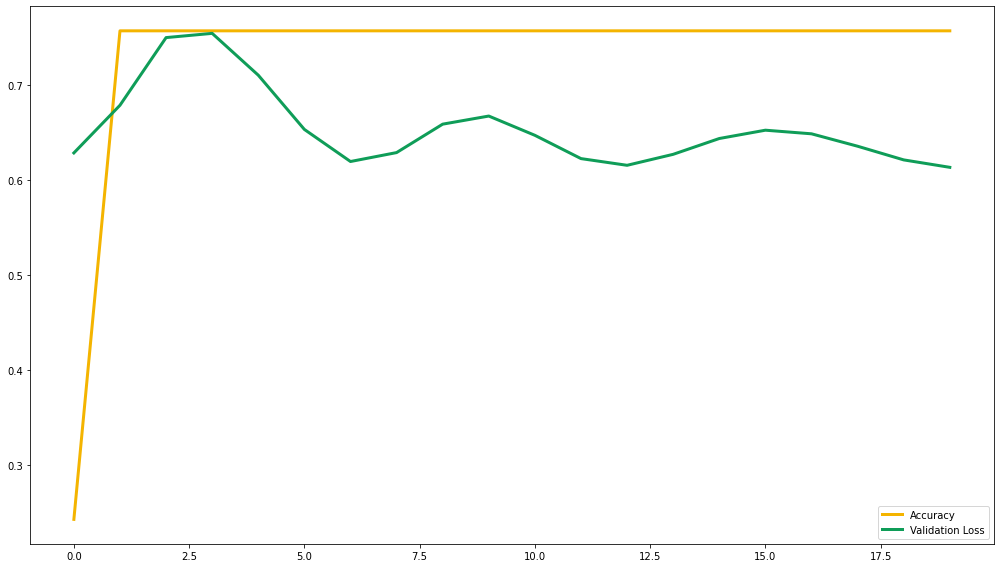

In [ ]:
import matplotlib.pyplot as plt
model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(figsize=(14,8))
num_epochs = model_history.shape[0]
ax.plot(np.arange(0, num_epochs), model_history["accuracy"], 
        label="Accuracy", lw=3, color='#f4b400')
ax.plot(np.arange(0, num_epochs), model_history["val_loss"], 
        label="Validation Loss", lw=3, color='#0f9d58')
ax.legend()
plt.tight_layout()
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8780487804878049


GradientBoosted

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics 
from sklearn.metrics import roc_curve, auc, roc_auc_score

gb_model = GradientBoostingClassifier(random_state=0, min_samples_split=8, min_samples_leaf=2)

gb_model.fit(X_train,y_train)
y_pred=gb_model.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8292682926829268


XGB

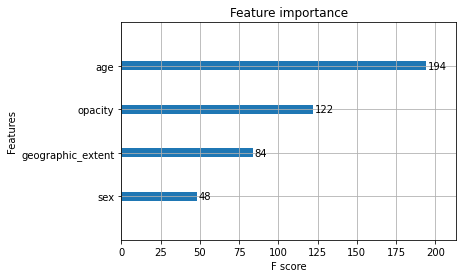

In [ ]:
from xgboost import XGBClassifier, plot_importance
xgb_model = XGBClassifier(random_state=1,learning_rate=0.01)
xgb_model.fit(X_train,y_train)
plot_importance(xgb_model)

In [ ]:
y_pred=xgb_model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8780487804878049


AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab_model = AdaBoostClassifier(random_state=1)
ab_model.fit(X_train,y_train)
ab_model.score(X_test,y_test)

0.8536585365853658

In [ ]:
y_pred=ab_model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8536585365853658


CatBoost

In [ ]:
!pip3 install catboost

     |████████████████████████████████| 67.4 MB 28 kB/s 


In [ ]:
from catboost import CatBoostClassifier
cb_model = CatBoostClassifier()  
cb_model.fit(X_train,y_train)
predict = cb_model.predict(X_test)

Learning rate set to 0.003771
0:	learn: 0.6900422	total: 49.7ms	remaining: 49.7s
1:	learn: 0.6867560	total: 50.3ms	remaining: 25.1s
2:	learn: 0.6842062	total: 50.6ms	remaining: 16.8s
3:	learn: 0.6826185	total: 50.9ms	remaining: 12.7s
4:	learn: 0.6801883	total: 51.4ms	remaining: 10.2s
5:	learn: 0.6790789	total: 51.6ms	remaining: 8.55s
6:	learn: 0.6761074	total: 52.1ms	remaining: 7.39s
7:	learn: 0.6737463	total: 52.6ms	remaining: 6.52s
8:	learn: 0.6712281	total: 53.1ms	remaining: 5.84s
9:	learn: 0.6685117	total: 53.4ms	remaining: 5.28s
10:	learn: 0.6654295	total: 53.9ms	remaining: 4.84s
11:	learn: 0.6623847	total: 54.4ms	remaining: 4.47s
12:	learn: 0.6600972	total: 54.9ms	remaining: 4.17s
13:	learn: 0.6576822	total: 55.4ms	remaining: 3.9s
14:	learn: 0.6551360	total: 56ms	remaining: 3.68s
15:	learn: 0.6525781	total: 56.4ms	remaining: 3.47s
16:	learn: 0.6507765	total: 57ms	remaining: 3.29s
17:	learn: 0.6493630	total: 57.5ms	remaining: 3.13s
18:	learn: 0.6469086	total: 58ms	remaining: 2.99s

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predict))

Accuracy: 0.926829268292683


##Using Sex type

In [ ]:
X_train1 = np.array(X_train['sex'], dtype=int).reshape(-1, 1)
X_test1 = np.array(X_test['sex'], dtype=int).reshape(-1, 1)


input = tf.keras.Input(shape=X_train1.shape[1], dtype='int32')
x = tf.keras.layers.Dense(256, activation='relu')(input)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)


model = tf.keras.models.Model(input, output)

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

history = model.fit(X_train1, y_train, validation_split=0.3,
          epochs=100, batch_size=128, verbose=True, callbacks=[EarlyStop])

y_sex_train = model.predict(X_train1)
y_sex_test = model.predict(X_test1)

Epoch 1/100
1/1 [==============================] - 0s 478ms/step - loss: 0.6846 - accuracy: 0.4545 - val_loss: 0.6870 - val_accuracy: 0.7241
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 0.6807 - accuracy: 0.7576 - val_loss: 0.6849 - val_accuracy: 0.7241
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 0.6770 - accuracy: 0.7576 - val_loss: 0.6829 - val_accuracy: 0.7241
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6734 - accuracy: 0.7576 - val_loss: 0.6810 - val_accuracy: 0.7241
Epoch 5/100
1/1 [==============================] - 0s 25ms/step - loss: 0.6699 - accuracy: 0.7576 - val_loss: 0.6792 - val_accuracy: 0.7241
Epoch 6/100
1/1 [==============================] - 0s 26ms/step - loss: 0.6664 - accuracy: 0.7576 - val_loss: 0.6775 - val_accuracy: 0.7241
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6631 - accuracy: 0.7576 - val_loss: 0.6760 - val_accuracy: 0.7241
Epoch 8/100
1/1 [==

### Using Age number

In [ ]:
X_train1 = np.array(X_train['age'], dtype=int).reshape(-1, 1)
X_test1 = np.array(X_test['age'], dtype=int).reshape(-1, 1)


input = tf.keras.Input(shape=X_train1.shape[1], dtype='int32')
x = tf.keras.layers.Dense(256, activation='relu')(input)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)


model = tf.keras.models.Model(input, output)

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

history = model.fit(X_train1, y_train, validation_split=0.3,
          epochs=20, batch_size=128, verbose=True, callbacks=[EarlyStop])

y_age_train = model.predict(X_train1)
y_age_test = model.predict(X_test1)

Epoch 1/20
1/1 [==============================] - 0s 470ms/step - loss: 2.5456 - accuracy: 0.2424 - val_loss: 1.9132 - val_accuracy: 0.2759
Epoch 2/20
1/1 [==============================] - 0s 22ms/step - loss: 1.8788 - accuracy: 0.2424 - val_loss: 1.2956 - val_accuracy: 0.2759
Epoch 3/20
1/1 [==============================] - 0s 18ms/step - loss: 1.2805 - accuracy: 0.2424 - val_loss: 0.8342 - val_accuracy: 0.2759
Epoch 4/20
1/1 [==============================] - 0s 21ms/step - loss: 0.8315 - accuracy: 0.2424 - val_loss: 0.6266 - val_accuracy: 0.7241
Epoch 5/20
1/1 [==============================] - 0s 23ms/step - loss: 0.6236 - accuracy: 0.7576 - val_loss: 0.6411 - val_accuracy: 0.7241
Epoch 6/20
1/1 [==============================] - 0s 21ms/step - loss: 0.6275 - accuracy: 0.7576 - val_loss: 0.7462 - val_accuracy: 0.7241
Epoch 7/20
1/1 [==============================] - 0s 19ms/step - loss: 0.7195 - accuracy: 0.7576 - val_loss: 0.8571 - val_accuracy: 0.7241


### Using Geographic Extent

In [ ]:
X_train1 = np.array(X_train['geographic_extent'], dtype=float).reshape(-1, 1)
X_test1 = np.array(X_test['geographic_extent'], dtype=float).reshape(-1, 1)


input = tf.keras.Input(shape=X_train1.shape[1], dtype='float32')
x = tf.keras.layers.Dense(256, activation='relu')(input)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)


model = tf.keras.models.Model(input, output)

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

history = model.fit(X_train1, y_train, validation_split=0.3,
          epochs=20, batch_size=128, verbose=True, callbacks=[EarlyStop])

y_geo_extent_train = model.predict(X_train1)
y_geo_extent_test = model.predict(X_test1)

Epoch 1/20
1/1 [==============================] - 1s 526ms/step - loss: 0.6783 - accuracy: 0.6667 - val_loss: 0.6674 - val_accuracy: 0.7241
Epoch 2/20
1/1 [==============================] - 0s 23ms/step - loss: 0.6666 - accuracy: 0.7576 - val_loss: 0.6579 - val_accuracy: 0.7241
Epoch 3/20
1/1 [==============================] - 0s 21ms/step - loss: 0.6575 - accuracy: 0.7576 - val_loss: 0.6504 - val_accuracy: 0.7241
Epoch 4/20
1/1 [==============================] - 0s 21ms/step - loss: 0.6508 - accuracy: 0.7576 - val_loss: 0.6449 - val_accuracy: 0.7241
Epoch 5/20
1/1 [==============================] - 0s 21ms/step - loss: 0.6464 - accuracy: 0.7576 - val_loss: 0.6410 - val_accuracy: 0.7241
Epoch 6/20
1/1 [==============================] - 0s 17ms/step - loss: 0.6438 - accuracy: 0.7576 - val_loss: 0.6386 - val_accuracy: 0.7241
Epoch 7/20
1/1 [==============================] - 0s 21ms/step - loss: 0.6428 - accuracy: 0.7576 - val_loss: 0.6372 - val_accuracy: 0.7241
Epoch 8/20
1/1 [==========

## Using Opacity

In [ ]:
X_train1 = np.array(X_train['opacity'], dtype=float).reshape(-1, 1)
X_test1 = np.array(X_test['opacity'], dtype=float).reshape(-1, 1)


input = tf.keras.Input(shape=X_train1.shape[1], dtype='float32')
x = tf.keras.layers.Dense(256, activation='relu')(input)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)


model = tf.keras.models.Model(input, output)

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

history = model.fit(X_train1, y_train, validation_split=0.3,
          epochs=20, batch_size=128, verbose=True, callbacks=[EarlyStop])

y_opacity_train = model.predict(X_train1)
y_opacity_test = model.predict(X_test1)

Epoch 1/20
1/1 [==============================] - 0s 490ms/step - loss: 0.6913 - accuracy: 0.6515 - val_loss: 0.6794 - val_accuracy: 0.7241
Epoch 2/20
1/1 [==============================] - 0s 19ms/step - loss: 0.6790 - accuracy: 0.7576 - val_loss: 0.6694 - val_accuracy: 0.7241
Epoch 3/20
1/1 [==============================] - 0s 19ms/step - loss: 0.6687 - accuracy: 0.7576 - val_loss: 0.6610 - val_accuracy: 0.7241
Epoch 4/20
1/1 [==============================] - 0s 37ms/step - loss: 0.6603 - accuracy: 0.7576 - val_loss: 0.6544 - val_accuracy: 0.7241
Epoch 5/20
1/1 [==============================] - 0s 18ms/step - loss: 0.6538 - accuracy: 0.7576 - val_loss: 0.6495 - val_accuracy: 0.7241
Epoch 6/20
1/1 [==============================] - 0s 18ms/step - loss: 0.6491 - accuracy: 0.7576 - val_loss: 0.6460 - val_accuracy: 0.7241
Epoch 7/20
1/1 [==============================] - 0s 17ms/step - loss: 0.6460 - accuracy: 0.7576 - val_loss: 0.6438 - val_accuracy: 0.7241
Epoch 8/20
1/1 [==========

In [ ]:
y_tr = pd.DataFrame(y_sex_train)
y_tr = pd.concat([y_tr, pd.DataFrame(y_age_train)], axis=1)
y_tr = pd.concat([y_tr, pd.DataFrame(y_geo_extent_train )], axis=1)
y_tr = pd.concat([y_tr, pd.DataFrame(y_opacity_train)], axis=1)

In [ ]:
y_te = pd.DataFrame(y_sex_test)
y_te = pd.concat([y_te, pd.DataFrame(y_age_test)], axis=1)
y_te = pd.concat([y_te, pd.DataFrame(y_geo_extent_test )], axis=1)
y_te = pd.concat([y_te, pd.DataFrame(y_opacity_test)], axis=1)


In [ ]:
y_tr.columns = ['sex', 'age', 'geographic_extent', 'opacity']
y_te.columns = ['sex', 'age', 'geographic_extent', 'opacity']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(8,5))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'Feature Importance')
  plt.xlabel('Feature Importance')
  plt.ylabel('Feature Names')

### 1. Using Gradient Boosted Classifier

In [ ]:
X_test

,sex,age,geographic_extent,opacity
12,1,35.0,8.000000,6.6500
71,1,55.0,6.207000,4.7110
121,1,30.0,5.336000,5.2960
93,0,78.0,0.319200,0.3117
21,0,55.0,6.955000,5.3000
16,1,54.0,4.447000,3.9100
2,1,65.0,4.335000,2.9100
1,1,65.0,2.776000,0.5289
131,1,77.0,4.817000,5.1450
132,1,42.0,4.955000,4.8160


In [ ]:
y_te

,sex,age,geographic_extent,opacity
0,0.699806,0.840633,0.728886,0.785723
1,0.699806,0.929399,0.690468,0.722458
2,0.699806,0.807564,0.670761,0.742703
3,0.555723,0.974148,0.544401,0.543486
4,0.555723,0.929399,0.706860,0.742838
5,0.699806,0.926339,0.650008,0.693204
6,0.699806,0.954120,0.647351,0.654398
7,0.699806,0.954120,0.609475,0.553659
8,0.699806,0.972971,0.658720,0.737571
9,0.699806,0.879006,0.661942,0.726163


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics 
from sklearn.metrics import roc_curve, auc, roc_auc_score

gb_model = GradientBoostingClassifier(random_state=0, min_samples_split=8, min_samples_leaf=2)

gb_model.fit(X_train, y_train)
predict = gb_model.predict(X_test)
original = y_test
print(classification_report(original, predict))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.90      0.87      0.89        31

    accuracy                           0.83        41
   macro avg       0.77      0.79      0.78        41
weighted avg       0.84      0.83      0.83        41



In [ ]:
print(confusion_matrix(original, predict))

[[ 7  3]
 [ 4 27]]


In [ ]:
print("ACCURACY: ", metrics.accuracy_score(original, predict))

ACCURACY:  0.8292682926829268


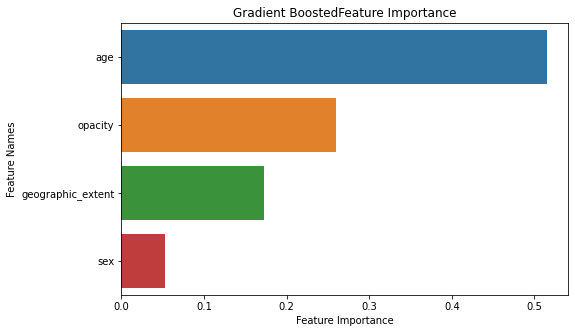

In [ ]:
plot_feature_importance(gb_model.feature_importances_,y_tr.columns,'Gradient Boosted')

0.9258064516129032


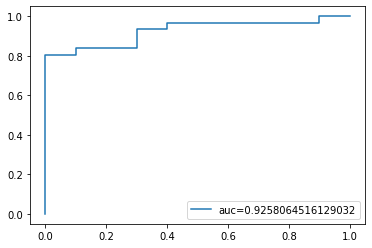

In [ ]:
y_pred_proba = gb_model.predict_proba(y_te)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print(auc)
plt.plot(fpr1,tpr1,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

### 2. Using XGBoost

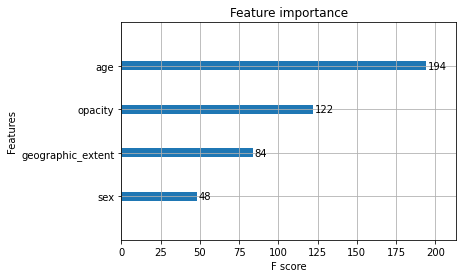

In [ ]:
from xgboost import XGBClassifier, plot_importance
xgb_model = XGBClassifier(random_state=1,learning_rate=0.01)
xgb_model.fit(y_tr, y_train)
plot_importance(xgb_model)

In [ ]:
predict1 = xgb_model.predict(y_te)
print(classification_report(original, predict))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.90      0.87      0.89        31

    accuracy                           0.83        41
   macro avg       0.77      0.79      0.78        41
weighted avg       0.84      0.83      0.83        41



In [ ]:
print(confusion_matrix(original, predict))

[[ 7  3]
 [ 4 27]]


In [ ]:
print("ACCURACY: ", metrics.accuracy_score(original, predict))

ACCURACY:  0.8292682926829268


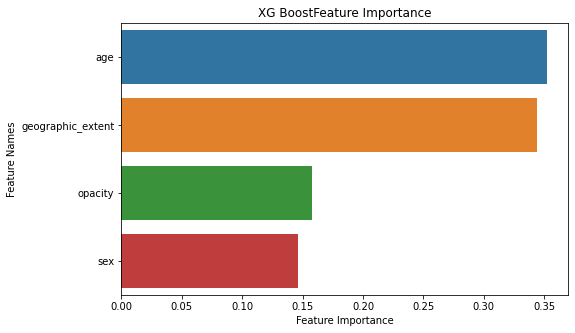

In [ ]:
plot_feature_importance(xgb_model.feature_importances_,y_tr.columns,'XG Boost')

In [ ]:
# false_positive_rate, true_positive_rate, thresholds = roc_curve(original, predict)
# print(auc(false_positive_rate, true_positive_rate), roc_auc_score(original, predict))

0.8903225806451612


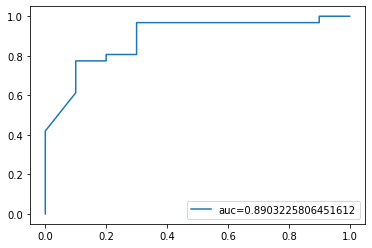

In [ ]:
y_pred_proba = xgb_model.predict_proba(y_te)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print(auc)
plt.plot(fpr2,tpr2,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

### 3. Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab_model = AdaBoostClassifier(random_state=1)
ab_model.fit(y_tr, y_train)
ab_model.score(y_te,y_test)

0.8536585365853658

In [ ]:
predict = ab_model.predict(y_te)
original = y_test
print(classification_report(original, predict))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.90      0.90      0.90        31

    accuracy                           0.85        41
   macro avg       0.80      0.80      0.80        41
weighted avg       0.85      0.85      0.85        41



In [ ]:
print(confusion_matrix(original, predict))

[[ 7  3]
 [ 3 28]]


In [ ]:
print("ACCURACY: ", metrics.accuracy_score(original, predict))

ACCURACY:  0.8536585365853658


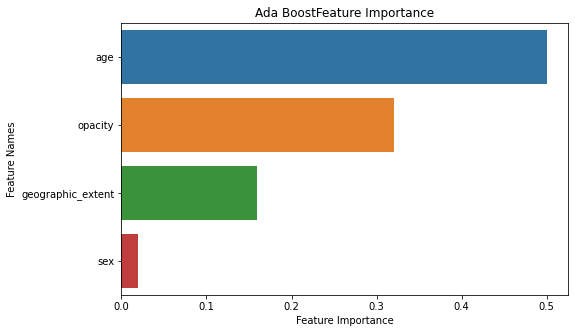

In [ ]:
plot_feature_importance(ab_model.feature_importances_,y_tr.columns,'Ada Boost')

In [ ]:
# false_positive_rate, true_positive_rate, thresholds = roc_curve(original, predict)
# print(auc(false_positive_rate, true_positive_rate), roc_auc_score(original, predict))

TypeError: ignored

0.8612903225806452


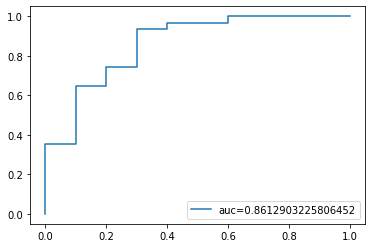

In [ ]:
y_pred_proba = ab_model.predict_proba(y_te)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print(auc)
plt.plot(fpr3,tpr3,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

### 4. Random Forest Classifier

In [ ]:
from sklearn.ensemble.forest import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100)  
rf_model.fit(y_tr, y_train)
predict = rf_model.predict(y_te) 
original = y_test
print(classification_report(original, predict))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.91      0.94      0.92        31

    accuracy                           0.88        41
   macro avg       0.84      0.82      0.83        41
weighted avg       0.87      0.88      0.88        41



In [ ]:
print(confusion_matrix(original, predict))

[[ 7  3]
 [ 2 29]]


In [ ]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(original, predict))

ACCURACY OF THE MODEL:  0.8780487804878049


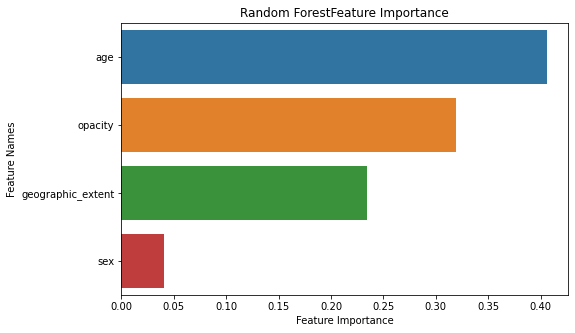

In [ ]:
plot_feature_importance(rf_model.feature_importances_,y_tr.columns,'Random Forest')

In [ ]:
# false_positive_rate, true_positive_rate, thresholds = roc_curve(original, predict)
# print(auc(false_positive_rate, true_positive_rate), roc_auc_score(original, predict))

0.9322580645161291


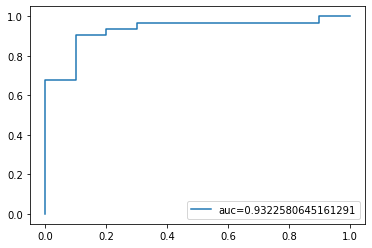

In [ ]:
y_pred_proba = rf_model.predict_proba(y_te)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print(auc)
plt.plot(fpr4,tpr4,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

### 5. CatBoost Classifier

In [ ]:
!pip3 install catboost

     |████████████████████████████████| 69.2MB 51kB/s 


In [ ]:
from catboost import CatBoostClassifier
cb_model = CatBoostClassifier()  
cb_model.fit(y_tr, y_train)
predict = cb_model.predict(y_te) 
original = y_test
print(classification_report(original, predict))

Learning rate set to 0.003771
0:	learn: 0.6905253	total: 798us	remaining: 798ms
1:	learn: 0.6875691	total: 1.37ms	remaining: 682ms
2:	learn: 0.6853437	total: 1.69ms	remaining: 562ms
3:	learn: 0.6837524	total: 2ms	remaining: 498ms
4:	learn: 0.6816670	total: 2.54ms	remaining: 505ms
5:	learn: 0.6790432	total: 2.98ms	remaining: 495ms
6:	learn: 0.6773348	total: 3.29ms	remaining: 467ms
7:	learn: 0.6743910	total: 3.83ms	remaining: 475ms
8:	learn: 0.6722711	total: 4.6ms	remaining: 507ms
9:	learn: 0.6700691	total: 5.86ms	remaining: 580ms
10:	learn: 0.6683758	total: 6.41ms	remaining: 577ms
11:	learn: 0.6656635	total: 7.26ms	remaining: 598ms
12:	learn: 0.6632606	total: 7.93ms	remaining: 602ms
13:	learn: 0.6606760	total: 9.07ms	remaining: 639ms
14:	learn: 0.6586487	total: 9.76ms	remaining: 641ms
15:	learn: 0.6560962	total: 10.5ms	remaining: 648ms
16:	learn: 0.6531393	total: 11.3ms	remaining: 653ms
17:	learn: 0.6505928	total: 12ms	remaining: 653ms
18:	learn: 0.6478272	total: 12.7ms	remaining: 655ms

In [ ]:
print(confusion_matrix(original, predict))

[[ 9  1]
 [ 2 29]]


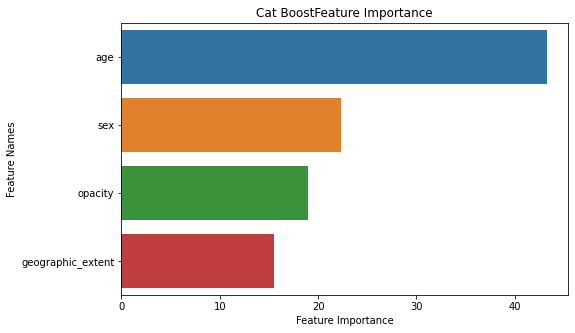

In [ ]:
plot_feature_importance(cb_model.feature_importances_,y_tr.columns,'Cat Boost')

In [ ]:
# false_positive_rate, true_positive_rate, thresholds = roc_curve(original, predict)
# auc_value = auc(false_positive_rate, false_positive_rate)
# print(auc_value, roc_auc_score(original, predict))

In [ ]:
# plt.plot(false_positive_rate,false_positive_rate,label="auc="+str(auc_value))
# plt.legend(loc=4)
# plt.show()

0.9483870967741936


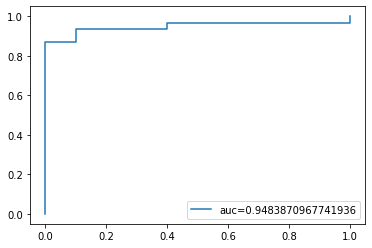

In [ ]:
y_pred_proba = cb_model.predict_proba(y_te)[::,1]
fpr5, tpr5, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print(auc)
plt.plot(fpr5,tpr5,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

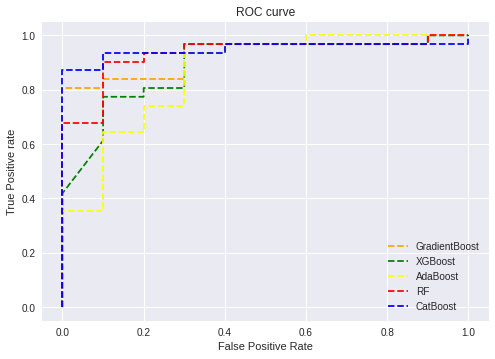

In [ ]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='GradientBoost')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='XGBoost')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='AdaBoost')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='RF')
plt.plot(fpr5, tpr5, linestyle='--',color='blue', label='CatBoost')
# plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();